## The Battle of Neighborhood to Open a new Restaurant in Bangalore city


1)Download and Explore Dataset

2)Explore Neighborhoods in Bangalore City

3)Analyze Each Neighborhood

4)Cluster Neighborhoods

5)Examine Clusters

### 1)Importing important libraries  for the whole process

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    attrs-21.2.0               |     pyhd8ed1ab_0          44 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    ca-certificates-2021.5.30  |       ha878542_0         136 KB  conda-forge
    certifi-2021.5.30          |   py36h5fab9bb_0         141 KB  conda-forge
    entrypoints-0.3            |  pyhd8ed1ab_1003           8 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    jsonschema-3.2.0           |     pyhd8ed1ab_3          45 KB  conda-

#### 2) Downloading and exploring the data by using the linkhttps://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df_india = df[df['Country Code'] == 1]
df_bang = df_india[df_india['City'] == 'Bangalore']
df_bang.reset_index(drop=True, inplace=True)
df_bang.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,50943,Sultans of Spice,1,Bangalore,"BluPetal Hotel, 60 Jyoti Nivas College Road, K...","BluPetal Hotel, Koramangala","BluPetal Hotel, Koramangala, Bangalore",77.615428,12.933284,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.1,Green,Very Good,2416
1,58268,The Fatty Bao - Asian Gastro Bar,1,Bangalore,"610, 3rd Floor, 12th Main, Off 80 Feet Road, I...",Indiranagar,"Indiranagar, Bangalore",77.645396,12.970221,Asian,...,Indian Rupees(Rs.),Yes,Yes,No,No,4,4.7,Dark Green,Excellent,2369
2,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,"Italian, American, Pizza",...,Indian Rupees(Rs.),No,No,No,No,4,4.8,Dark Green,Excellent,10934
3,18162866,Three Dots & A Dash,1,Bangalore,"840/1,100 Feet Road, Metro Pillar 56-57, Indir...",Indiranagar,"Indiranagar, Bangalore",77.640489,12.980410,"European, Continental",...,Indian Rupees(Rs.),Yes,No,No,No,3,3.9,Yellow,Good,1354
4,18407918,Bombay Brasserie,1,Bangalore,"2989/B, 12th Main Road, HAL 2nd Stage, Indiran...",Indiranagar,"Indiranagar, Bangalore",77.645748,12.970324,Modern Indian,...,Indian Rupees(Rs.),No,Yes,No,No,3,4.2,Green,Very Good,231



## Data Cleansing
Selected only require columns and rows from data  frame to form a new data set Blre_df

In [4]:
Blre_df= df_bang[df_bang.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [5]:
Blre_df = Blre_df[Blre_df['Aggregate rating'] !=0.0]
Blre_df.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,Sultans of Spice,"BluPetal Hotel, Koramangala",77.615428,12.933284,"North Indian, Mughlai",4.1,Very Good,2416
1,The Fatty Bao - Asian Gastro Bar,Indiranagar,77.645396,12.970221,Asian,4.7,Excellent,2369
2,Toit,Indiranagar,77.640709,12.979166,"Italian, American, Pizza",4.8,Excellent,10934
3,Three Dots & A Dash,Indiranagar,77.640489,12.980410,"European, Continental",3.9,Good,1354
4,Bombay Brasserie,Indiranagar,77.645748,12.970324,Modern Indian,4.2,Very Good,231


In [6]:
Blre_df.isnull().sum()

Restaurant Name     0
Locality            0
Longitude           0
Latitude            0
Cuisines            0
Aggregate rating    0
Rating text         0
Votes               0
dtype: int64

created map to show the restaurant clusters using the folium

In [7]:
# create map of New York using latitude and longitude values
map_banglore= folium.Map(location=[12.9716,77.5946], zoom_start=10)

# add markers to map
for latitude, longitude, Locality, cuisine in zip(Blre_df['Latitude'], Blre_df['Longitude'], Blre_df['Locality'], Blre_df['Cuisines']):
    label = '{}, {}'.format('Locality', 'Restaurant Name')
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_banglore)  
    
map_banglore

#### colring the locality pointer by means of cluster

In [8]:
bangalore_Rest = folium.Map(location=[12.9716,77.5946], zoom_start=12)

X = Blre_df['Latitude']
Y = Blre_df['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
Blre_df ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(Blre_df['Latitude'], Blre_df['Longitude'], Blre_df['Locality'], Blre_df['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(bangalore_Rest)  

bangalore_Rest

In [9]:
Blre_df.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
0,Sultans of Spice,"BluPetal Hotel, Koramangala",77.615428,12.933284,"North Indian, Mughlai",4.1,Very Good,2416,0
1,The Fatty Bao - Asian Gastro Bar,Indiranagar,77.645396,12.970221,Asian,4.7,Excellent,2369,2
2,Toit,Indiranagar,77.640709,12.979166,"Italian, American, Pizza",4.8,Excellent,10934,2
3,Three Dots & A Dash,Indiranagar,77.640489,12.980410,"European, Continental",3.9,Good,1354,2
4,Bombay Brasserie,Indiranagar,77.645748,12.970324,Modern Indian,4.2,Very Good,231,2


##### Places which  having best restaurant in Bangalore?

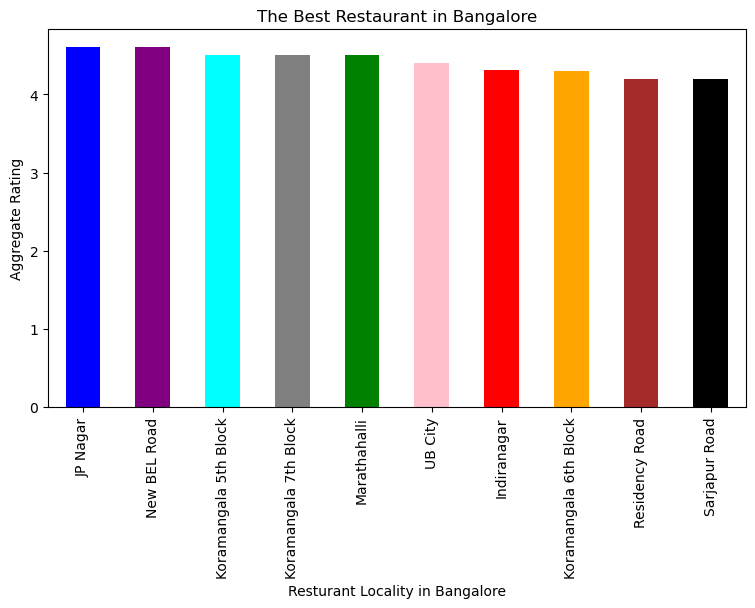

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)

#giving a bar plot
Blre_df.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar',color=['blue','purple','cyan','grey','green','pink', 'red','orange','brown','Black'])
plt.title('The Best Restaurant in Bangalore')

plt.xlabel('Resturant Locality in Bangalore')
plt.ylabel('Aggregate Rating')

plt.show()

The most of best rated restaurants are in the area of JP Nagar

#### Low quality restaurant area  in the banglore as below

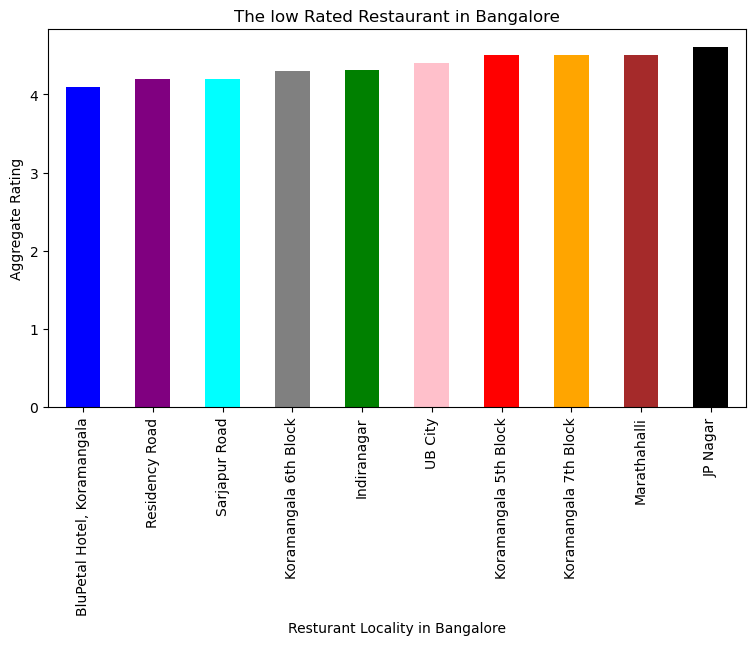

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from numpy.random import rand

my_cmap = cm.get_cmap('jet')
my_norm = Normalize(vmin=0, vmax=8)

plt.figure(figsize=(9,5), dpi = 100)

#giving a bar plot
Blre_df.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar',color=['blue','purple','cyan','grey','green','pink', 'red','orange','brown','Black'])
plt.title('The low Rated Restaurant in Bangalore')

plt.xlabel('Resturant Locality in Bangalore')
plt.ylabel('Aggregate Rating')

plt.show()

 The worst rated restaurant is BluPetal Hotel,Koramangal

#### Graph on total number of restaurants in selected area

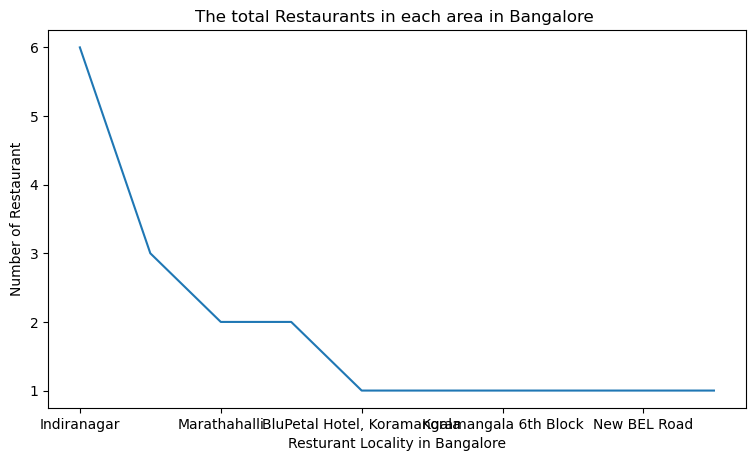

In [12]:
plt.figure(figsize=(9,5), dpi = 100)

#giving a line plot
Blre_df.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='line')
plt.title('The total Restaurants in each area in Bangalore ')

plt.xlabel('Resturant Locality in Bangalore')
plt.ylabel('Number of Restaurant')

plt.show()


The heighest number of restaurant that are safe to eat lies in the area Indranagar and


The lowest number of restaurant lies as following bar graph

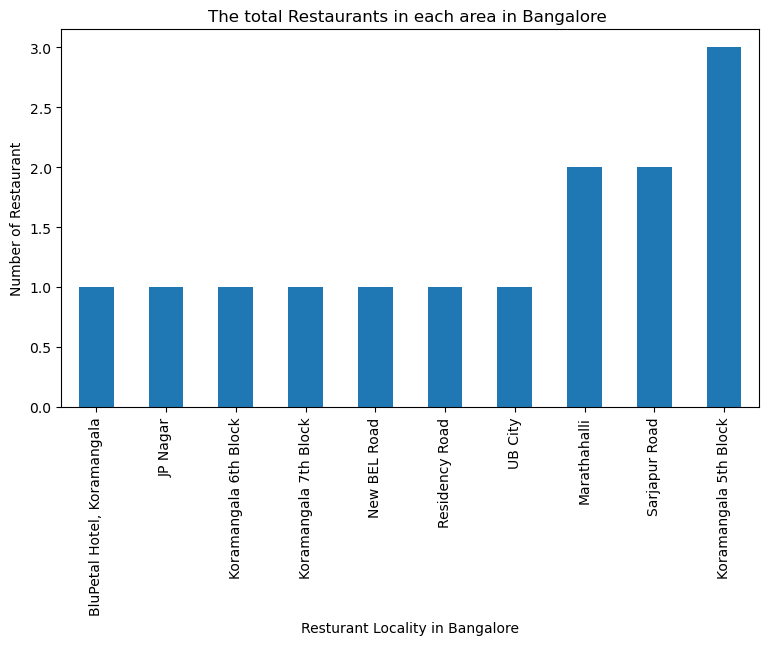

In [13]:
plt.figure(figsize=(9,5), dpi = 100)

#giving a bar plot
Blre_df.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')
plt.title('The total Restaurants in each area in Bangalore ')

plt.xlabel('Resturant Locality in Bangalore')
plt.ylabel('Number of Restaurant')

plt.show()


#### The best places for Continental restaurant in Banglore

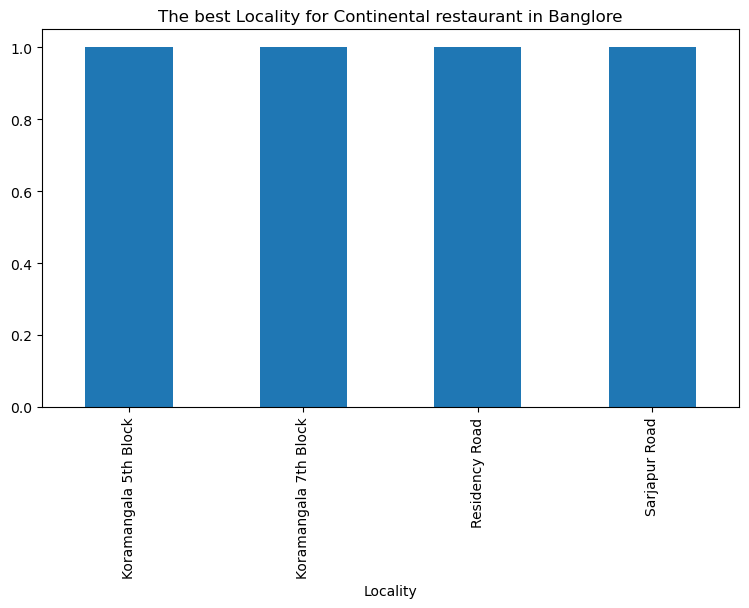

In [14]:
plt.figure(figsize=(9,5), dpi = 100)

#giving a bar plot
Blre_df[Blre_df['Cuisines'].str.startswith('Continental')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')
plt.title('The best Locality for Continental restaurant in Banglore')


#plt.xlabel('Resturant Locality in Banglore')
#On y-axis
#plt.ylabel('Number of Continental Restaurant')

#displays the plot
plt.show()

#### Koramangala 5th block, Koramangala 7th block, Residency road, sarjapur are  place where there is availability of Continental cuisine 

### Preprocessing the data

In [15]:
Blre_rest =  Blre_df.groupby('Locality').count()['Restaurant Name'].to_frame()
Blre_rest_rating= Blre_df.groupby('Locality')['Aggregate rating'].mean().to_frame()


Cuisines = Blre_df.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
Rating_text = Blre_df.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
Votes= Blre_df.groupby(['Locality'])['Votes'].sum().to_frame()
Latitude = Blre_df.groupby('Locality').mean()['Latitude'].to_frame()
longitude = Blre_df.groupby('Locality').mean()['Longitude'].to_frame()
B_restaurants= pd.merge(Latitude,longitude,on='Locality').merge(Blre_rest, on='Locality').merge(Cuisines, on='Locality').merge(Blre_rest_rating,on ='Locality').merge(Rating_text,on ='Locality').merge(Votes, on ='Locality')

In [16]:
B_restaurants

,Locality,Latitude,Longitude,Restaurant Name,Cuisines,Aggregate rating,Rating text,Votes
0,"BluPetal Hotel, Koramangala",12.933284,77.615428,1,"North Indian, Mughlai",4.100000,Very Good,2416
1,Indiranagar,12.976278,77.642775,6,"Asian, Italian, American, Pizza, European, Con...",4.316667,"Excellent, Good, Very Good",19834
2,JP Nagar,12.906229,77.596791,1,"Pizza, Cafe, Italian",4.600000,Excellent,781
3,Koramangala 5th Block,12.933947,77.615415,3,"Continental, American, Italian, North Indian, ...",4.500000,"Excellent, Very Good",15328
4,Koramangala 6th Block,12.939496,77.625999,1,"North Indian, Chinese, Italian, Street Food, D...",4.300000,Very Good,753
5,Koramangala 7th Block,12.935662,77.614130,1,"Continental, American",4.500000,Excellent,1288
6,Marathahalli,12.962655,77.698025,2,"European, Mediterranean, North Indian, Asian, ...",4.500000,"Excellent, Very Good",7890
7,New BEL Road,13.029198,77.570997,1,"Pizza, Cafe, Italian",4.600000,Excellent,627
8,Residency Road,12.972532,77.608179,1,Continental,4.200000,Very Good,334
9,Sarjapur Road,12.913652,77.680818,2,"Finger Food, North Indian, Italian, Continenta...",4.200000,"Excellent, Good",6110


In [17]:
B_restaurants = B_restaurants[B_restaurants['Aggregate rating'] != 0.000000]
B_restaurants.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
B_restaurants.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"BluPetal Hotel, Koramangala",12.933284,77.615428,1,"North Indian, Mughlai",4.100000,Very Good,2416
1,Indiranagar,12.976278,77.642775,6,"Asian, Italian, American, Pizza, European, Con...",4.316667,"Excellent, Good, Very Good",19834
2,JP Nagar,12.906229,77.596791,1,"Pizza, Cafe, Italian",4.600000,Excellent,781
3,Koramangala 5th Block,12.933947,77.615415,3,"Continental, American, Italian, North Indian, ...",4.500000,"Excellent, Very Good",15328
4,Koramangala 6th Block,12.939496,77.625999,1,"North Indian, Chinese, Italian, Street Food, D...",4.300000,Very Good,753


In [18]:
B_restaurants.shape

(11, 8)


Foursquare credential

In [19]:
CLIENT_ID = 'KLYTYZ1DUHIYRIGYG5RG43ZWGABXJBOQNYSCVJE15PNWLRCG' # your Foursquare ID
CLIENT_SECRET = 'IEI5AW0JIO0CI4Q5PYYJNQKKSIESPGIXGSSVXVB5AS3JB4M1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KLYTYZ1DUHIYRIGYG5RG43ZWGABXJBOQNYSCVJE15PNWLRCG
CLIENT_SECRET:IEI5AW0JIO0CI4Q5PYYJNQKKSIESPGIXGSSVXVB5AS3JB4M1


####  create a function to repeat the same process to all the Locality in Bangalore

In [20]:
## create a function to repeat the same process to all the Locality in Bangalore

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
# We're going to need a list of categories.
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
            
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
# find the venues in all New Delhi Locality
Banglore_venues = getNearbyVenues(names=B_restaurants['Locality'],
                                   latitudes=B_restaurants['Lat'],
                                   longitudes=B_restaurants['Lng']
                                  )

BluPetal Hotel, Koramangala
Indiranagar
JP Nagar
Koramangala 5th Block
Koramangala 6th Block
Koramangala 7th Block
Marathahalli
New BEL Road
Residency Road
Sarjapur Road
UB City


In [23]:
Banglore_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"BluPetal Hotel, Koramangala",12.933284,77.615428,Truffles Ice & Spice,12.933443,77.614265,Burger Joint
1,"BluPetal Hotel, Koramangala",12.933284,77.615428,Gilly's Rest-O-Bar,12.932987,77.614755,Bar
2,"BluPetal Hotel, Koramangala",12.933284,77.615428,"Ice & Spice, Koramangla",12.933284,77.613847,Bakery
3,"BluPetal Hotel, Koramangala",12.933284,77.615428,Zingron - Naga Kitchen,12.936271,77.615051,Indian Restaurant
4,"BluPetal Hotel, Koramangala",12.933284,77.615428,Khawa Karpo,12.934051,77.616640,Chinese Restaurant


In [24]:
Banglore_venues.groupby('Locality').count()


,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"BluPetal Hotel, Koramangala",100,100,100,100,100,100
Indiranagar,53,53,53,53,53,53
JP Nagar,25,25,25,25,25,25
Koramangala 5th Block,100,100,100,100,100,100
Koramangala 6th Block,29,29,29,29,29,29
Koramangala 7th Block,75,75,75,75,75,75
Marathahalli,9,9,9,9,9,9
New BEL Road,24,24,24,24,24,24
Residency Road,97,97,97,97,97,97


In [25]:
print('There are {} uniques categories.'.format(len(Banglore_venues['Venue Category'].unique())))

There are 107 uniques categories.


In [26]:
## Analyze Each Locality

# one hot encoding
Banglore_onehot = pd.get_dummies(Banglore_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
Banglore_onehot['Locality'] = Banglore_venues['Locality'] 

# move Locality column to the first column
column_list =Banglore_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
Banglore_onehot = Banglore_onehot[column_list]
Banglore_onehot.head()

,Locality,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,...,Tea Room,Tennis Stadium,Thai Restaurant,Tibetan Restaurant,Toy / Game Store,Track Stadium,Udupi Restaurant,Vegetarian / Vegan Restaurant,Women's Store,Yoga Studio
0,"BluPetal Hotel, Koramangala",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"BluPetal Hotel, Koramangala",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"BluPetal Hotel, Koramangala",0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"BluPetal Hotel, Koramangala",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"BluPetal Hotel, Koramangala",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
Banglore_grouped = Banglore_onehot.groupby('Locality').mean().reset_index()
Banglore_grouped

,Locality,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,...,Tea Room,Tennis Stadium,Thai Restaurant,Tibetan Restaurant,Toy / Game Store,Track Stadium,Udupi Restaurant,Vegetarian / Vegan Restaurant,Women's Store,Yoga Studio
0,"BluPetal Hotel, Koramangala",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.020000,0.020000,...,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Indiranagar,0.000000,0.000000,0.000000,0.018868,0.000000,0.000000,0.000000,0.000000,0.037736,...,0.000000,0.000000,0.018868,0.000000,0.000000,0.000000,0.018868,0.037736,0.018868,0.018868
2,JP Nagar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.080000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Koramangala 5th Block,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.020000,0.020000,...,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Koramangala 6th Block,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.034483,...,0.034483,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.034483,0.000000,0.000000
5,Koramangala 7th Block,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013333,0.013333,0.026667,...,0.013333,0.000000,0.000000,0.013333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Marathahalli,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,New BEL Road,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Residency Road,0.000000,0.020619,0.010309,0.000000,0.000000,0.010309,0.000000,0.010309,0.020619,...,0.000000,0.000000,0.010309,0.010309,0.000000,0.000000,0.000000,0.010309,0.000000,0.000000
9,Sarjapur Road,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
Banglore_grouped.shape

(11, 108)

### Analyzing each neighborhood

In [29]:
# print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in Banglore_grouped['Locality']:
    print("----"+hood+"----")
    temp = Banglore_grouped[Banglore_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BluPetal Hotel, Koramangala----
                  venue  freq
0     Indian Restaurant  0.18
1  Fast Food Restaurant  0.07
2                  Café  0.07
3    Chinese Restaurant  0.06
4                Lounge  0.04


----Indiranagar----
                venue  freq
0                Café  0.15
1   Indian Restaurant  0.11
2  Chinese Restaurant  0.06
3        Dessert Shop  0.06
4          Restaurant  0.04


----JP Nagar----
               venue  freq
0  Indian Restaurant  0.12
1        Pizza Place  0.08
2        Coffee Shop  0.08
3             Bakery  0.08
4                Bar  0.08


----Koramangala 5th Block----
                  venue  freq
0     Indian Restaurant  0.19
1                  Café  0.07
2    Chinese Restaurant  0.06
3  Fast Food Restaurant  0.06
4                Lounge  0.04


----Koramangala 6th Block----
                venue  freq
0   Indian Restaurant  0.10
1         Pizza Place  0.07
2  Seafood Restaurant  0.07
3                Café  0.07
4          Steakhouse  0.07



In [30]:
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
# create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = Banglore_grouped['Locality']

for ind in np.arange(Banglore_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Banglore_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"BluPetal Hotel, Koramangala",Indian Restaurant,Fast Food Restaurant,Café,Chinese Restaurant,Lounge,Electronics Store,Dessert Shop,Pub,Restaurant,Bookstore
1,Indiranagar,Café,Indian Restaurant,Dessert Shop,Chinese Restaurant,Pizza Place,Bar,Bakery,Lounge,Restaurant,Department Store
2,JP Nagar,Indian Restaurant,Pizza Place,Bakery,Bar,Coffee Shop,Café,Snack Place,Garden,Fast Food Restaurant,Mediterranean Restaurant
3,Koramangala 5th Block,Indian Restaurant,Café,Fast Food Restaurant,Chinese Restaurant,Lounge,Electronics Store,Dessert Shop,Restaurant,Bookstore,Shopping Mall
4,Koramangala 6th Block,Indian Restaurant,Pizza Place,Seafood Restaurant,Café,Beer Garden,Steakhouse,Pub,General Entertainment,Fast Food Restaurant,Italian Restaurant
5,Koramangala 7th Block,Indian Restaurant,Chinese Restaurant,Café,Fast Food Restaurant,Lounge,Dessert Shop,Restaurant,Bookstore,Electronics Store,Donut Shop
6,Marathahalli,Indian Restaurant,Dessert Shop,Clothing Store,Chinese Restaurant,Café,Pizza Place,Electronics Store,Coffee Shop,Comfort Food Restaurant,Cosmetics Shop
7,New BEL Road,Ice Cream Shop,Fast Food Restaurant,Pizza Place,Bar,Indian Restaurant,Mexican Restaurant,Chinese Restaurant,Asian Restaurant,Burger Joint,German Restaurant
8,Residency Road,Café,Indian Restaurant,Bar,Lounge,Chinese Restaurant,Pub,Coffee Shop,Clothing Store,Donut Shop,Bookstore
9,Sarjapur Road,Indian Restaurant,Café,Brewery,Afghan Restaurant,Ice Cream Shop,Liquor Store,Lounge,Electronics Store,Eastern European Restaurant,Coffee Shop


## 4) K-mean clustering:
#### Run k-means to cluster the Locality into 5 clusters.


In [32]:
# set number of clusters
kclusters = 5

Banglore_clustering = Banglore_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Banglore_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(11,)

In [33]:
# add clustering labels
Banglore_merged =B_restaurants.head(240)
Banglore_merged['Cluster Labels'] = kmeans.labels_

# merge Banglore_grouped  to add latitude/longitude for each Locality
Banglore_merged = Banglore_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

Banglore_merged

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"BluPetal Hotel, Koramangala",12.933284,77.615428,1,"North Indian, Mughlai",4.100000,Very Good,2416,0,Indian Restaurant,Fast Food Restaurant,Café,Chinese Restaurant,Lounge,Electronics Store,Dessert Shop,Pub,Restaurant,Bookstore
1,Indiranagar,12.976278,77.642775,6,"Asian, Italian, American, Pizza, European, Con...",4.316667,"Excellent, Good, Very Good",19834,0,Café,Indian Restaurant,Dessert Shop,Chinese Restaurant,Pizza Place,Bar,Bakery,Lounge,Restaurant,Department Store
2,JP Nagar,12.906229,77.596791,1,"Pizza, Cafe, Italian",4.600000,Excellent,781,0,Indian Restaurant,Pizza Place,Bakery,Bar,Coffee Shop,Café,Snack Place,Garden,Fast Food Restaurant,Mediterranean Restaurant
3,Koramangala 5th Block,12.933947,77.615415,3,"Continental, American, Italian, North Indian, ...",4.500000,"Excellent, Very Good",15328,0,Indian Restaurant,Café,Fast Food Restaurant,Chinese Restaurant,Lounge,Electronics Store,Dessert Shop,Restaurant,Bookstore,Shopping Mall
4,Koramangala 6th Block,12.939496,77.625999,1,"North Indian, Chinese, Italian, Street Food, D...",4.300000,Very Good,753,0,Indian Restaurant,Pizza Place,Seafood Restaurant,Café,Beer Garden,Steakhouse,Pub,General Entertainment,Fast Food Restaurant,Italian Restaurant
5,Koramangala 7th Block,12.935662,77.614130,1,"Continental, American",4.500000,Excellent,1288,0,Indian Restaurant,Chinese Restaurant,Café,Fast Food Restaurant,Lounge,Dessert Shop,Restaurant,Bookstore,Electronics Store,Donut Shop
6,Marathahalli,12.962655,77.698025,2,"European, Mediterranean, North Indian, Asian, ...",4.500000,"Excellent, Very Good",7890,2,Indian Restaurant,Dessert Shop,Clothing Store,Chinese Restaurant,Café,Pizza Place,Electronics Store,Coffee Shop,Comfort Food Restaurant,Cosmetics Shop
7,New BEL Road,13.029198,77.570997,1,"Pizza, Cafe, Italian",4.600000,Excellent,627,3,Ice Cream Shop,Fast Food Restaurant,Pizza Place,Bar,Indian Restaurant,Mexican Restaurant,Chinese Restaurant,Asian Restaurant,Burger Joint,German Restaurant
8,Residency Road,12.972532,77.608179,1,Continental,4.200000,Very Good,334,0,Café,Indian Restaurant,Bar,Lounge,Chinese Restaurant,Pub,Coffee Shop,Clothing Store,Donut Shop,Bookstore
9,Sarjapur Road,12.913652,77.680818,2,"Finger Food, North Indian, Italian, Continenta...",4.200000,"Excellent, Good",6110,1,Indian Restaurant,Café,Brewery,Afghan Restaurant,Ice Cream Shop,Liquor Store,Lounge,Electronics Store,Eastern European Restaurant,Coffee Shop


#### creating a final map

In [34]:

# create final map
map_clusters = folium.Map(location=[12.9716, 77.5946], tiles='CartoDB dark_matter', zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Banglore_merged['Lat'], Banglore_merged['Lng'], Banglore_merged['Locality'], Banglore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters
Here we examine the clusters and their neighbourhood  venues

## Cluster 1

In [35]:
Banglore_merged.loc[Banglore_merged['Cluster Labels'] == 0, Banglore_merged.columns[[1] + list(range(5, Banglore_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,12.933284,4.100000,Very Good,2416,0,Indian Restaurant,Fast Food Restaurant,Café,Chinese Restaurant,Lounge,Electronics Store,Dessert Shop,Pub,Restaurant,Bookstore
1,12.976278,4.316667,"Excellent, Good, Very Good",19834,0,Café,Indian Restaurant,Dessert Shop,Chinese Restaurant,Pizza Place,Bar,Bakery,Lounge,Restaurant,Department Store
2,12.906229,4.600000,Excellent,781,0,Indian Restaurant,Pizza Place,Bakery,Bar,Coffee Shop,Café,Snack Place,Garden,Fast Food Restaurant,Mediterranean Restaurant
3,12.933947,4.500000,"Excellent, Very Good",15328,0,Indian Restaurant,Café,Fast Food Restaurant,Chinese Restaurant,Lounge,Electronics Store,Dessert Shop,Restaurant,Bookstore,Shopping Mall
4,12.939496,4.300000,Very Good,753,0,Indian Restaurant,Pizza Place,Seafood Restaurant,Café,Beer Garden,Steakhouse,Pub,General Entertainment,Fast Food Restaurant,Italian Restaurant
5,12.935662,4.500000,Excellent,1288,0,Indian Restaurant,Chinese Restaurant,Café,Fast Food Restaurant,Lounge,Dessert Shop,Restaurant,Bookstore,Electronics Store,Donut Shop
8,12.972532,4.200000,Very Good,334,0,Café,Indian Restaurant,Bar,Lounge,Chinese Restaurant,Pub,Coffee Shop,Clothing Store,Donut Shop,Bookstore


## Cluster 2

In [36]:
Banglore_merged.loc[Banglore_merged['Cluster Labels'] == 1, Banglore_merged.columns[[1] + list(range(5, Banglore_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,12.913652,4.2,"Excellent, Good",6110,1,Indian Restaurant,Café,Brewery,Afghan Restaurant,Ice Cream Shop,Liquor Store,Lounge,Electronics Store,Eastern European Restaurant,Coffee Shop


## Cluster 3

In [37]:
Banglore_merged.loc[Banglore_merged['Cluster Labels'] == 2, Banglore_merged.columns[[1] + list(range(5, Banglore_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,12.962655,4.5,"Excellent, Very Good",7890,2,Indian Restaurant,Dessert Shop,Clothing Store,Chinese Restaurant,Café,Pizza Place,Electronics Store,Coffee Shop,Comfort Food Restaurant,Cosmetics Shop


## Cluster 4

In [38]:
Banglore_merged.loc[Banglore_merged['Cluster Labels'] == 3, Banglore_merged.columns[[1] + list(range(5, Banglore_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,13.029198,4.6,Excellent,627,3,Ice Cream Shop,Fast Food Restaurant,Pizza Place,Bar,Indian Restaurant,Mexican Restaurant,Chinese Restaurant,Asian Restaurant,Burger Joint,German Restaurant


## Cluster 5

In [39]:
Banglore_merged.loc[Banglore_merged['Cluster Labels'] == 4, Banglore_merged.columns[[1] + list(range(5, Banglore_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,12.972161,4.4,Very Good,754,4,Italian Restaurant,Café,Lounge,Hotel,Coffee Shop,Stadium,Ice Cream Shop,Mexican Restaurant,Pizza Place,Brewery
